In [2]:
#PI értékeit számító benchmark méréseket feldolgozó python program (Egy processzor magot vesz igénybe)
#Az egyes részek alatt található a leírás hogy éppen mit szeretnék megjeleníteni az eredményekből
#Jobb értéknek számít az, ami hamarabb befejeződik.
#3.5 -nél találhatók a legjobb értékek, és ezek egészen 7 mp ig mozognak(amik már rossznak számítanak)

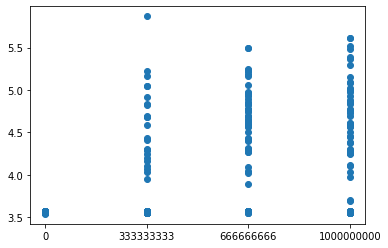

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
rtime = []
wakeup_gran = []
f = open("ertekek.json")
data = json.load(f)
for i in data["measurements"]:
    wakeup_gran.append(i["parameters"]["wakeup_gran"])
    min = i["results"][0]
    for j in i["results"]:
        if (j<min):5í5
            min = j
    rtime.append(min)
plt.plot(wakeup_gran,rtime,"o")
plt.show()
#Itt az öt futási mintából a legjobbat választottam ki, x-wake-up preemption granularity(mozgó paraméter, többi rögzített) y-runtime
#Amit érdekelt hogy mik voltak a legjobb eredmények,az adott beállítással, és amint látható hogy kisebb beállításnál egészen egy kupacban maradtak a eredmények

In [3]:
import json
f = open("ertekek.json")
data = json.load(f)
min = data["measurements"][0]["results"][0]
max = data["measurements"][0]["results"][0]

for i in data["measurements"]:
    for j in i["results"]:
        if(j>max):
            max=j
        if(j<min):
            min=j

best=[]
worst=[]
for i in data["measurements"]:
    found=False
    mfound=False
    for j in i["results"]:
        if (j==min):
            found=True
        if (j==max):
            mfound=True
    if(found):
        best.append(i)
    if(mfound):
        worst.append(i)
print("best runtime: ",min,"\n",best)

print("worst runtime: ",max,"\n",worst)

#A legjobb és legrosszabb futási eredmény és annak beállításai:

best runtime:  3.54 
 [{'parameters': {'latency': '333400000', 'min_gran': '1000000000', 'wakeup_gran': '0', 'prio': '-6'}, 'results': [3.58, 3.54, 3.66, 3.57, 3.57]}]
worst runtime:  7.85 
 [{'parameters': {'latency': '100000', 'min_gran': '1000000000', 'wakeup_gran': '666666666', 'prio': '-20'}, 'results': [5.17, 5.78, 6.14, 7.85, 5.27]}]


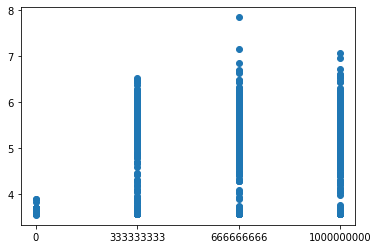

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
rtime = []
wakeup_gran = []
f = open("ertekek.json")
data = json.load(f)
for i in data["measurements"]:
    for k in range(5):
        wakeup_gran.append(i["parameters"]["wakeup_gran"])
    for j in i["results"]:
        rtime.append(j)
plt.plot(wakeup_gran,rtime,"o")
plt.show()
#Az összes minta szerepel a grafikonon, a hozzá társuló wake-up preemption granularity paraméterrel
#Itt is megfigyelhető, az ami a legelső grafikonnál, kis wakeup_gran beállításnál, több jó eredmény született


 0	   : 	 286 db 
 333333333 : 	 175 db 
 666666666 : 	 68 db 
 1000000000: 	 72 db


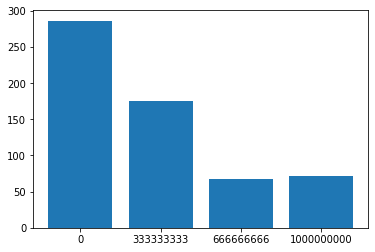

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
rtime = []
min_gran = []
first=0
second=0
third=0
forth=0
f = open("ertekek.json")
data = json.load(f)
for i in data["measurements"]:
    count=0
    for j in i["results"]:
        if(j<3.6):
            count+=1
    if(i["parameters"]["wakeup_gran"]=="0"):
        first+=count
    elif(i["parameters"]["wakeup_gran"]=="333333333"):
        second+=count
    elif(i["parameters"]["wakeup_gran"]=="666666666"):
        third+=count
    elif(i["parameters"]["wakeup_gran"]=="1000000000"):
        forth+=count
print("\n","0\t   : \t",first,"db","\n","333333333 : \t",second,"db","\n","666666666 : \t",third,"db","\n","1000000000: \t",forth,"db")
mylabels=np.array(["0","333333333","666666666","1000000000"])
y = np.array([first,second,third,forth])
plt.bar(mylabels,y )
plt.show()
#Itt az figyelhető meg, hogy adott beállításon, hány darab olyan minta volt amely 3.6 másodperc alatt végzett.
#Ennél a paraméternél is legalacsonyabb beállítással, sokkal több esetben fordult elő jobb eredmény